## Deep Learning Homework 1
Maya Rotmensch (mer567), Alex Pine (akp258)

## 1.1: Warmup


We are given the following definition of $ x_{out} $:

$$ x_{out} = \sigma(x_{in}) = \frac{1}{1 + e^{-x_{in}}} $$

Taking it's derivative with respect to $ x_{in} $ we get:

$$ \frac{\partial x_{out}}{\partial x_{in}} = -(1+e^{-x_{in}})^{-2} (-e^{-x_{in}}) $$ 

$$ \frac{\partial x_{out}}{\partial x_{in}} = \frac{e^{-x_{in}}}{(1 + e^{-x_{in}})^2} $$

$E$ is a function of $x_{out}$ by definition, and $x_{out} = \sigma(x_{in})$. Therefore we can apply the Chain rule to  find $ \frac{\partial E}{\partial x_{in}} $:

$$ \frac{\partial E}{\partial x_{in}} = \frac{\partial E}{\partial x_{out}} \frac{\partial x_{out}}{\partial x_{in}} $$

Since we've found $\frac{\partial x_{out}}{\partial x_{in}}$, and the problem states that $\frac{\partial E}{\partial x_{out}}$ is given, we get 

$$ \frac{\partial E}{\partial x_{in}} = \frac{\partial E}{\partial x_{out}} \frac{e^{-x_{in}}}{(1 + e^{-x_{in}})^2} $$

## 1.2 Softmax

We are given the following definition for the i-th component of a vector $ X_{out} $:

$$ (X_{out})_i = \frac{e^{-\beta(X_{in})_i}}{\sum_k e^{-\beta(X_{in})_k}} $$

We are asked to find $ \frac{\partial (X_{out})_i}{\partial (X_{in})_j} $.

Let's define some new variables for notational simplicity:

$$ X_i = (X_{in})_i $$

$$ f(X_i) = e^{-\beta X_i}, g(X) = \sum_k f(X_k) $$

$$ Y_i = (X_{out})_i = \frac{f(X_i)}{g(X)} $$

$$ J_{ij} = \frac{\partial (X_{out})_i}{\partial (X_{in})_j} = \frac{\partial Y_i}{\partial X_j} $$

In this context, the Quotient Rule is:

$$ J_{ij} = \frac{ g(X) \frac{\partial f(X_i)}{\partial X_j} - f(X_i) \frac{\partial g(X)}{\partial X_j} }{g(X)^2} $$

When $ i = j $, then 

$$ J_{ij} = J_{ii} = \frac{ g(X) \frac{\partial f(X_i)}{\partial X_i} - f(X_i) \frac{\partial g(X)}{\partial X_i} }{g(X)^2} $$

First we solve for $\frac{\partial f(X_i)}{\partial X_i}$ and $\frac{\partial g(X)}{\partial X_i}$:

$$ \frac{\partial f(X_i)}{\partial X_i} = -\beta e^{-\beta X_i} = -\beta f(X_i) $$

$$ \frac{\partial g(X)}{\partial X_i} = -\beta f(X_i) $$

Substituting these back into $J_{ij}$, we get:

$$ J_{ij} = \frac{ g(X) (-\beta f(X_i)) - f(X_i) (-\beta f(X_i)) }{g(X)^2} $$

$$ J_{ij} = -\beta \frac{f(X_i)}{g(X)} + \beta \frac{f(X_i)^2}{g(X)^2} $$

Recognizing that $Y_i = \frac{f(X_i)}{g(X)}$, this becomes:

$$ J_{ij} = -\beta Y_i(1-Y_i) $$

When $ i \neq j $, then 

$$ J_{ij} = \frac{ g(X) \frac{\partial f(X_i)}{\partial X_j} - f(X_i) \frac{\partial g(X)}{\partial X_j} }{g(X)^2} $$

Now that the derivatives are in regard to $X_j$ instead of $X_j$, we get:

$$ \frac{\partial f(X_i)}{\partial X_j} = 0 $$

$$ \frac{\partial g(X)}{\partial X_j} = -\beta e^{-\beta X_j} = -\beta f(X_j) $$

Substituting these back into $J_{ij}$, we get:

$$ J_{ij} = \frac{ - f(X_i) (-\beta f(X_j)) }{g(X)^2} $$ 

$$ J_{ij} = \beta \frac{f(X_i)}{g(X)} \frac{f(X_j)}{g(X)} $$

$$ J_{ij} = \beta Y_i Y_j $$

Going back to the original notation of the problem, the solution can be summarized as:

$$ \frac{\partial (X_{out})_i}{\partial (X_{in})_j} = -\beta (X_{out})_i(1-(X_{out})_j), \text{ when } i = j $$

and

$$ \frac{\partial (X_{out})_i}{\partial (X_{in})_j} = \beta (X_{out})_i(X_{out})_j, \text{ when } i \neq j $$

## Problem 2: MNIST 

In order to prepare our Torch code for experimentation, we made a series of changes to the structure of the example code. First, we refactored the code to minimize its use of confusing and hard-to-manage global variables, replacing it with code that relied on function parameters, local variables, and return values instead.

Secondly, we wrote code that split the non-test data into two sets: one for training the model, and one for validation, with a 75% and 25% split for each set, respectively. All of our subsequent experiments use this data for evaluation. The test data is ignored entirely, except for generating the final predictions.

We've also modified the model saving process. Instead of overwriting the model in each iteration(as was in the original script), We've created a function savemodel() that saves the current model only if it is better than every model seen thus far, as judged by accuracy on the validation set. We do this as to not save a model that suffers from overfitting. 

Due to time considerations, we've limited the maximum amount if epochs in each model to 10. 

(side note: all of the plotting, except for the batch plots, we conducted in python based on the results logged in the Logger files).

### Experiment 1: Batch Size

Out first experiment to improve our model's performance was to find the best "mini-batch" size for stochastic gradient descent. We wanted to see how the size of each mini-batch affected the training speed and the accuracy of the model on the validation set once it had been trained.

We tried batch sizes of 1, 10, 50, and 100 data points. For each batch size, we trained the model for 10 epochs, and calculated the average training time per data point, and the accuracy of the trained model on the validation set. We ran this on the 'small' data set of 6000 examples (4500 for training, 1500 for validation) instead of the full training set so the experiment could be run within an hour.

There wasn't a clear relationship between batch size and average training time per data point. The average training time decreased a small amount when the batch size went up from 1 to 10, and then nearly doubled when it when up to 50. A batch size of 100 data points had the fastest average training time of all. Since this model was trained on a CPU, the lack of a clear relationship between batch size and training time isn't so surprising, because there no ability parallize the training computations. One might expect the training time to decrease witch batch size when run on a GPU, which enables more parallel computations.

These results are illustrated by the graph below. The X-axis of the graph goes from 1 to 4, each corresponding to batch sizes of 1, 10, 50, and 100, respectively. The Y-axis is the number of milliseconds required to train a single data point, averaged accross all 10 epochs.  

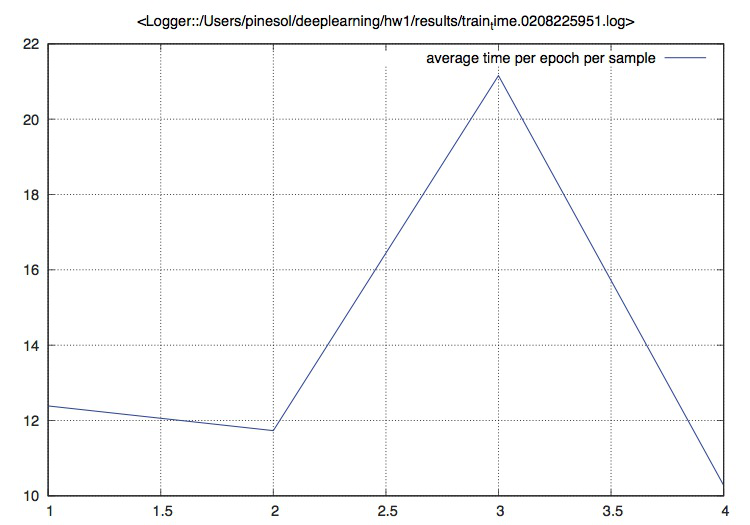

In [3]:
require 'torch';
require 'image';
itorch.image(image.load('images/train_time.0208225951.log.jpg'))


The relationship between mini-batch size and the model's accuracy on the validation set was clearer: the larger the batch size, the less accurate the results. This is surprising--in traditional machine learning models, where the cost function is convex, the accuracy should not be much affected by the batch size. Here, it seems that extra stochasticity allows the training process to escape high-cost local minima that trap the those with a larger batch size.

This is illustrated in the graph below. Again, the X-axis values of 1,2, 3, and 4 correspond to batch sizes of 1, 10, 50, and 100. The Y-axis is the percentage of the validation set that was predicted correctly.

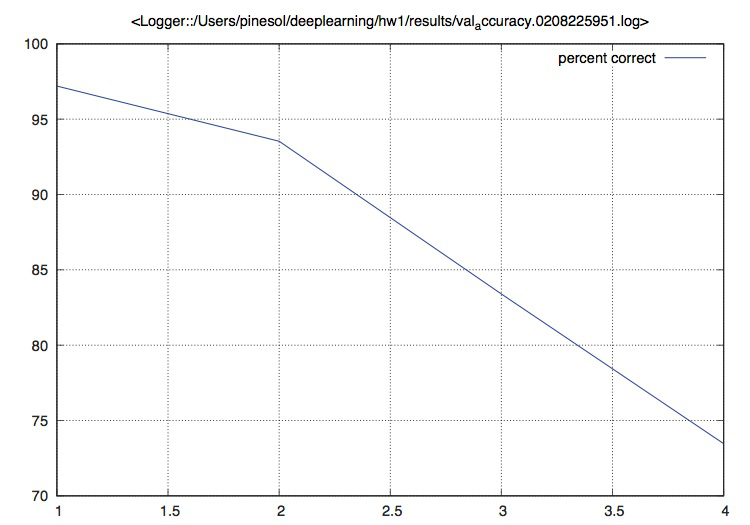

In [18]:
itorch.image(image.load('images/val_accuracy.0208225951.log.jpg'))


### Experiment 2:  Learning Rate - TO DO

The next experiement we ran had to do with the learning rate of model. We left the decay rate as is (1e-7)
Our rational was what if the initial learning rate was too large then we might miss the optima and it will take a long time to converge. However if the learning rate was too small we're might end up stuck far away from the optima as the learning rate will decay before we reach the promising region of our space.

Using 


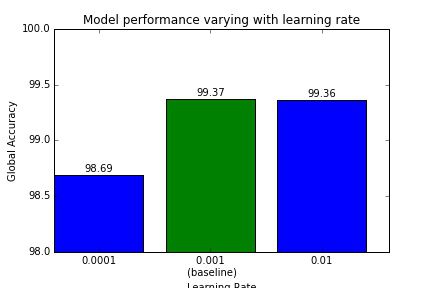

In [8]:
itorch.image(image.load('images/learning_rate_exp.jpg'))

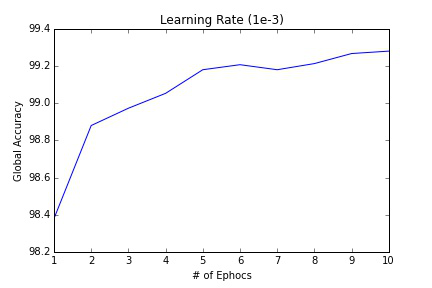

In [13]:
-- We've plotted
itorch.image(image.load('images/acclearningrate.jpg'))

### Experiment 3:  Number of Filters - TO DO 

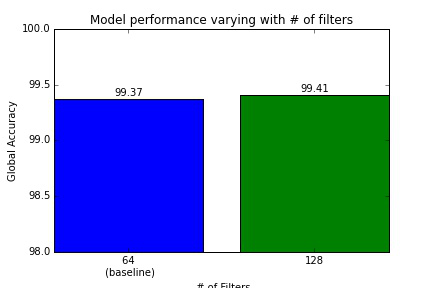

In [9]:
itorch.image(image.load('images/filters.jpg'))

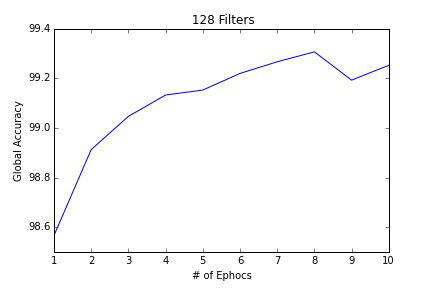

In [11]:
itorch.image(image.load('images/accfilters.jpg'))

### Experiment 4:  Polling Operation - TO DO 

[string "# numbers taken from test ..."]:2: unexpected symbol near '[': 

### Experiment 5: Dropout

Overfitting is a serious problem in networks with a large number of parameters. In addition, the large number of parameters make run time extremely slow.
In an attempt and combat this we've used the "dropout" technique proposed by 
Srivastava, Hinton et al. in 2012 paper (***'Dropout: A Simple Way to Prevent Neural Networks from
Overfitting)*** which proposed to 'randomly drop units [in the network] (along with their connections)' as a way to prevent overfitting.(https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf).



#### A Note about out overfitting and accuracy curves:
It is clear from the close that while we are close to reaching saturation, we have not reached it not are we overfitting. 
Nonetheless, we are looking into techniques such as dropout which are meant to combat overfitting since we feel like practical experience with this technique might help us in future assignments. 
